In [1]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

#import api key
from config import weather_api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)
lat_range = (-90, -18)
lng_range = (-180, -150)

#formatting for bold text
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [2]:
#printing out the minneapolis json to see the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "minneapolis").json()
response

{'coord': {'lon': -93.26, 'lat': 44.98},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 17.44,
  'feels_like': 5.23,
  'temp_min': 15.01,
  'temp_max': 19.99,
  'pressure': 1022,
  'humidity': 72},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 160, 'gust': 17.22},
 'clouds': {'all': 1},
 'dt': 1579644231,
 'sys': {'type': 1,
  'id': 5829,
  'country': 'US',
  'sunrise': 1579614231,
  'sunset': 1579647856},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

In [3]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=-18.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=-150.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add a one second interval between queries to stay within API query limits
time.sleep(1)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

11

In [4]:
#Perform API Calls
#write something more descriptive...

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_info = []

#in order to print the print log according to how the homework looks (change comment before final draft)
i = 1
set_number = 1

print("Beginning Data Retrieval") 
print("--------------------------------")

for j, city in enumerate(cities):
    
    if (j % 50 == 0 and j >= 50):
        set_number = set_number + 1
        i = 0
    print(f"Processing Record {i} of Set {set_number} | {city}")
    i=i+1
   
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        lat = response['coord']['lat']
        name = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lngs = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        city_info.append({"City": name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lngs,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
    except:
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | pangai
Processing Record 7 of Set 1 | vaitape
Processing Record 8 of Set 1 | moerai
Processing Record 9 of Set 1 | neiafu
Processing Record 10 of Set 1 | tevaitoa
Processing Record 11 of Set 1 | haapiti
------------------------
Data Retrieval Complete
------------------------


In [5]:
#export the city data into a csv
#display the dataframe

city_df = pd.DataFrame(city_info)

city_df.to_csv('cities.csv', encoding="utf-8", index_label="City_ID")

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100,NZ,1579643835,93,-46.19,168.86,62.01,3.00
1,Vaini,40,TO,1579643837,78,-21.20,-175.20,80.60,6.93
2,Avera,1,US,1579644123,32,33.19,-82.53,42.80,8.05
3,Avarua,100,CK,1579643820,94,-21.21,-159.78,77.00,5.82
4,Alofi,40,NU,1579644284,74,-19.06,-169.92,80.60,8.05


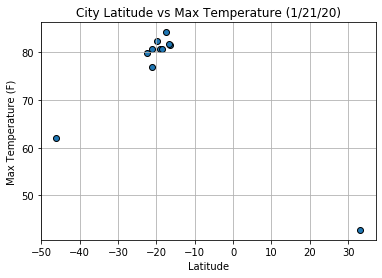

In [10]:
#plot latitude v temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Max Temperature (1/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Temp_v_Latitude.png"))

#for reference on setting limits:
#plt.xlim(-50, 35)
#plt.ylim(20, 100)

**CODE:**  This code is utilizing www.openweathermap.org to gather data on cities around the globe.  We specifically called for info on city name, latitudes, longitudes, cloudiness, humidity, wind speed, country and date.  For the above scatter plot, we looked at Max Temperature versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused.  


